# Isingův model spinů

Vytvoříme pole náhodné pole boolean a poté pomocí monte carlo simulace budu měnit spiny a sledovat jak se mění energie celého modelu. Konec a začátek je vlastně spojen do jednoho okruhu.

In [212]:
import numpy as np

boolean_array = np.random.choice(a=[False, True], size=(1,10))
print(boolean_array)

[[False  True False  True  True  True  True  True False False]]


In [213]:
def energy_calculation_modulo(array):
    energy = 0
    L = len(array)
    for i in range(L):
        j = (i + 1) % L
        if array[i] != array[j]:
            energy += 1
    return energy

def monte_carlo_energy(array):
    energy = energy_calculation_modulo(array)
    for _ in range(1000):
        L = len(array)
        random_index = np.random.randint(0, L)
        array[random_index] = not array[random_index]
        energy_2 = energy_calculation_modulo(array)
        if energy_2 > energy:
            array[random_index] = not array[random_index]
        else:
            energy = energy_2
            print("New energy:", energy)
            print("new array:", array)
    return energy

In [214]:
monte_carlo_energy(boolean_array[0])

New energy: 4
new array: [False  True False  True  True  True  True False False False]
New energy: 4
new array: [False  True False  True  True  True  True  True False False]
New energy: 4
new array: [False  True False False  True  True  True  True False False]
New energy: 2
new array: [False False False False  True  True  True  True False False]
New energy: 2
new array: [False False False False False  True  True  True False False]
New energy: 2
new array: [False False False False False  True  True  True  True False]
New energy: 2
new array: [False False False False False False  True  True  True False]
New energy: 2
new array: [False False False False False  True  True  True  True False]
New energy: 2
new array: [False False False False False False  True  True  True False]
New energy: 2
new array: [False False False False False False  True  True  True  True]
New energy: 2
new array: [False False False False False False False  True  True  True]
New energy: 2
new array: [ True False False

0

In [215]:
boolean_array_2 = np.random.choice(a=[False, True], size=(1,10))
print(boolean_array_2)

[[ True False False  True False False  True  True False  True]]


## Přidání teploty do modelu

In [216]:
k = 0.001

def monte_carlo_energy_with_temp(array, temperature):
    energy = energy_calculation_modulo(array)
    for _ in range(100):
        L = len(array)
        random_index = np.random.randint(0, L)
        array[random_index] = not array[random_index]
        energy_2 = energy_calculation_modulo(array)
        delta_E = energy_2 - energy
        if delta_E > 0:
            probability = np.exp(-delta_E / (k*temperature))
            print("probability:", probability)
            if np.random.rand() < probability:
                energy = energy_2
                print("New energy:", energy)
                print("new array:", array)
            else:
                array[random_index] = not array[random_index]
        else:
            energy = energy_2
            print("New energy:", energy)
            print("new array:", array)
    return energy

In [217]:
import numpy as np
import random as rd

# Konfigurace
L = 10                  # Délka řetězce
TEPLOTA = 5000.0         # Teplota (T)
K_BOLTZMANN = 0.001     # Boltzmannova konstanta (k_B)

# Inicializace
# Vytvoření numpy pole
array = np.random.choice([True, False], size=L) 
print("Počáteční pole:", array)

def energy_calculation_modulo(array):
    """Vypočítá energii jako počet opačných párů (periodické okraje)."""
    energy = 0
    L = len(array)
    for i in range(L):
        j = (i + 1) % L
        # Porovnání != vrátí True/False, .astype(int) převede na 1/0
        energy += (array[i] != array[j]).astype(int) 
    return energy

def monte_carlo_step_efficient(array, T, k):
    """Provede jeden MC krok s lokálním Delta E a Metropolisovým kritériem."""
    
    L = len(array)
    current_energy = energy_calculation_modulo(array)

    random_index = rd.randint(0, L - 1)
    i = random_index
    i_prev = (i - 1) % L
    i_next = (i + 1) % L
    
    # Vypište stav před krokem pro přehlednost
    print(f"Aktuální E_celková: {current_energy}")

    # 4. Lokální výpočet Delta E (Nyní s explicitním převodem na int)
    
    # Původní příspěvek k energii (počet opačných vazeb v okolí i)
    E_local_old = ( (array[i] != array[i_prev]).astype(int) + 
                    (array[i] != array[i_next]).astype(int) )
    
    # Nový příspěvek k energii (simulace převrácení not array[i])
    # array[i] se nejprve převede na bool (True/False) pro Python 'not'
    new_spin_value = not array[i] 
    E_local_new = ( (new_spin_value != array[i_prev]).astype(int) + 
                    (new_spin_value != array[i_next]).astype(int) )
    
    delta_E = E_local_new - E_local_old
    
    print(f"Delta_E (Změna E): {delta_E}")
    
    # 5. Metropolisovo kritérium
    
    if delta_E <= 0:
        # Přijato: Vždy změnit
        array[i] = new_spin_value
        return current_energy + delta_E
        
    else:
        # Přijato s pravděpodobností P = exp(-Delta E / (k*T))
        probability = np.exp(-delta_E / (k * T))
        print(f"Pravděpodobnost přijetí: {probability}")
        r = rd.random()
        
        
        if r < probability:
            # Přijato: náhodně se přijme stav s vyšší energií
            array[i] = new_spin_value
            return current_energy + delta_E
        else:
            # Odmítnuto: pole zůstává beze změny
            return current_energy


# --- Spuštění simulace pro N kroků ---
num_steps = 100

current_E = energy_calculation_modulo(array)

for step in range(num_steps):
    current_E = monte_carlo_step_efficient(array, TEPLOTA, K_BOLTZMANN)
    print("----------------")

Počáteční pole: [ True False False  True False  True False False False  True]
Aktuální E_celková: 6
Delta_E (Změna E): -2
----------------
Aktuální E_celková: 4
Delta_E (Změna E): 2
Pravděpodobnost přijetí: 0.6703200460356393
----------------
Aktuální E_celková: 4
Delta_E (Změna E): 0
----------------
Aktuální E_celková: 4
Delta_E (Změna E): 2
Pravděpodobnost přijetí: 0.6703200460356393
----------------
Aktuální E_celková: 6
Delta_E (Změna E): 0
----------------
Aktuální E_celková: 6
Delta_E (Změna E): 0
----------------
Aktuální E_celková: 6
Delta_E (Změna E): -2
----------------
Aktuální E_celková: 4
Delta_E (Změna E): 0
----------------
Aktuální E_celková: 4
Delta_E (Změna E): 0
----------------
Aktuální E_celková: 4
Delta_E (Změna E): 0
----------------
Aktuální E_celková: 4
Delta_E (Změna E): 0
----------------
Aktuální E_celková: 4
Delta_E (Změna E): 2
Pravděpodobnost přijetí: 0.6703200460356393
----------------
Aktuální E_celková: 4
Delta_E (Změna E): -2
----------------
Aktuáln

Teplota T=1.00 K, Střední Energie E=0.00
Teplota T=51.49 K, Střední Energie E=0.00
Teplota T=101.99 K, Střední Energie E=0.00
Teplota T=152.48 K, Střední Energie E=0.00
Teplota T=202.98 K, Střední Energie E=0.01
Teplota T=253.47 K, Střední Energie E=0.09
Teplota T=303.97 K, Střední Energie E=0.24
Teplota T=354.46 K, Střední Energie E=0.17
Teplota T=404.96 K, Střední Energie E=0.49
Teplota T=455.45 K, Střední Energie E=0.86
Teplota T=505.95 K, Střední Energie E=0.99
Teplota T=556.44 K, Střední Energie E=1.28
Teplota T=606.94 K, Střední Energie E=1.50
Teplota T=657.43 K, Střední Energie E=1.85
Teplota T=707.93 K, Střední Energie E=1.84
Teplota T=758.42 K, Střední Energie E=2.20
Teplota T=808.92 K, Střední Energie E=2.22
Teplota T=859.41 K, Střední Energie E=2.40
Teplota T=909.91 K, Střední Energie E=2.47
Teplota T=960.40 K, Střední Energie E=2.53
Teplota T=1010.90 K, Střední Energie E=2.70
Teplota T=1061.39 K, Střední Energie E=2.87
Teplota T=1111.89 K, Střední Energie E=2.93
Teplota T=1

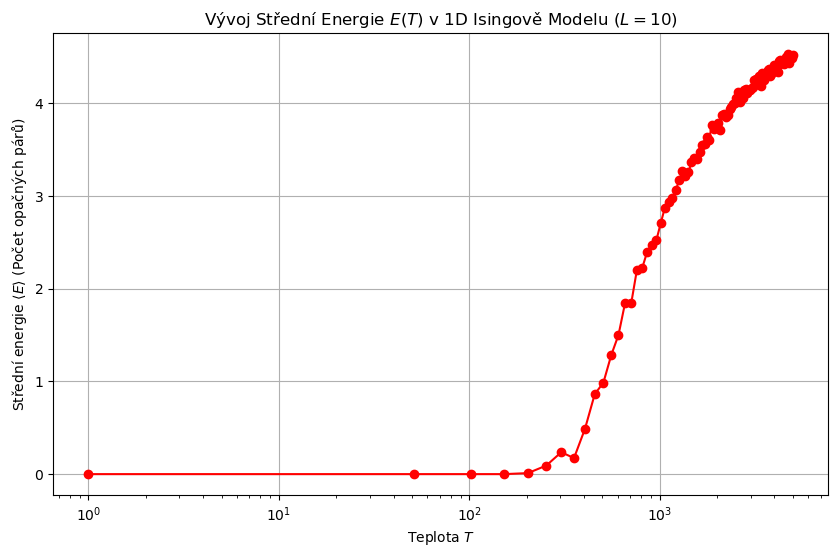

In [218]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# --- KONSTANTY A PARAMETRY ---
L = 10                  # Délka řetězce (Malé L pro rychlý příklad)
K_BOLTZMANN = 0.001     # Boltzmannova konstanta (k_B)

NUM_TEMP_POINTS = 100    # Počet bodů na křivce E(T)
MIN_T, MAX_T = 1.0, 5000.0 # Rozsah teplot

N_THERMAL = 5000        # Počet kroků pro termalizaci (rovnováhu)
N_MEASURE = 10000       # Počet kroků pro měření


# --- ZÁKLADNÍ FUNKCE (Z předchozí odpovědi) ---

def energy_calculation_modulo(array):
    """Vypočítá energii jako počet opačných párů (periodické okraje)."""
    energy = 0
    L = len(array)
    for i in range(L):
        j = (i + 1) % L
        # Porovnání != vrátí True/False, .astype(int) převede na 1/0
        energy += (array[i] != array[j]).astype(int) 
    return energy

def monte_carlo_step_quiet(array, T, k):
    
    L = len(array)
    random_index = rd.randint(0, L - 1)
    i = random_index
    i_prev = (i - 1) % L
    i_next = (i + 1) % L
    
    # --- Lokální výpočet Delta E ---
    E_local_old = ( (array[i] != array[i_prev]).astype(int) + 
                    (array[i] != array[i_next]).astype(int) )
    
    new_spin_value = not array[i] 
    E_local_new = ( (new_spin_value != array[i_prev]).astype(int) + 
                    (new_spin_value != array[i_next]).astype(int) )
    
    delta_E = E_local_new - E_local_old
    
    # --- Metropolisovo kritérium ---
    if delta_E <= 0:
        array[i] = new_spin_value
        return delta_E
    else:
        probability = np.exp(-delta_E / (k * T))
        if rd.random() < probability:
            array[i] = new_spin_value
            return delta_E
        else:
            return 0 # Změna energie je nulová (pokus byl odmítnut)


# --- HLAVNÍ SIMULAČNÍ FUNKCE ---

def simulate_energy_vs_temperature(L, min_T, max_T, num_T, k, n_thermal, n_measure):
    
    temperatures = np.linspace(min_T, max_T, num_T)
    mean_energies = []
    
    # Iterace přes teploty
    for T in temperatures:
        
        # 1. Inicializace nového pole pro každou T (náhodný start)
        current_array = np.random.choice([True, False], size=L)
        current_energy = energy_calculation_modulo(current_array)
        
        # 2. Termalizace (Uvedení systému do rovnováhy)
        for _ in range(n_thermal):
            delta_E = monte_carlo_step_quiet(current_array, T, k)
            current_energy += delta_E
            
        # 3. Měření (Sběr dat)
        energy_samples = []
        for _ in range(n_measure):
            delta_E = monte_carlo_step_quiet(current_array, T, k)
            current_energy += delta_E
            # Ukládáme hodnotu celkové energie
            energy_samples.append(current_energy)
            
        # 4. Výpočet střední energie
        mean_E = np.mean(energy_samples)
        mean_energies.append(mean_E)
        
        print(f"Teplota T={T:.2f} K, Střední Energie E={mean_E:.2f}")

    return temperatures, mean_energies


# --- SPUŠTĚNÍ ---

T_values, E_values = simulate_energy_vs_temperature(
    L, MIN_T, MAX_T, NUM_TEMP_POINTS, K_BOLTZMANN, N_THERMAL, N_MEASURE
)

# --- Vykreslení výsledků ---
plt.figure(figsize=(10, 6))
plt.plot(T_values, E_values, 'ro-')
plt.title(f'Vývoj Střední Energie $E(T)$ v 1D Isingově Modelu ($L={L}$)')
plt.xlabel('Teplota $T$')
plt.ylabel(r'Střední energie $\langle E \rangle$ (Počet opačných párů)')
plt.xscale('log')
plt.grid(True)
plt.show()